In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import re  
from nltk import word_tokenize
from nltk.tokenize import WordPunctTokenizer
from nltk.stem.porter import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer
# import string
import warnings
# ! pip install wordcloud
#from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder,LabelBinarizer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.naive_bayes import MultinomialNB, GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report,precision_score, recall_score,roc_curve, roc_auc_score, auc

import tensorflow as tf
from tensorflow import keras
from sklearn.utils import class_weight
from sklearn.preprocessing import label_binarize
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D,Dropout,GRU
from keras.models import Sequential
from keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import RandomizedSearchCV, KFold
from sklearn.preprocessing import MinMaxScaler

In [50]:
train = pd.read_csv("/content/drive/MyDrive/MachineLearningMSi/AI_capstone_Project/Ecommerce/train_data.csv")
train.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",Electronics,2016-12-26T00:00:00.000Z,Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ad...,Powerful tablet,Positive
1,Amazon - Echo Plus w/ Built-In Hub - Silver,Amazon,"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital...","Electronics,Hardware",2018-01-17T00:00:00.000Z,I purchased two Amazon in Echo Plus and two dots plus four fire sticks and the hub Philips hue for lamp for the family at Christmas 2017. I‚Äôm so...,Amazon Echo Plus AWESOME,Positive
2,"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",Amazon,"Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital...","Electronics,Hardware",2017-12-20T00:00:00.000Z,Just an average Alexa option. Does show a few things on screen but still limited.,Average,Neutral
3,"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum",Amazon,"eBook Readers,Fire Tablets,Electronics Features,Tablets,Amazon Tablets,College Ipads & Tablets,Electronics,Electronics Deals,College Electronics,F...","Office Supplies,Electronics",2017-08-04T00:00:00.000Z,"very good product. Exactly what I wanted, and a very good price",Greattttttt,Positive
4,"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",Amazon,"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",Electronics,2017-01-23T00:00:00.000Z,This is the 3rd one I've purchased. I've bought one for all of my nieces. No other case compares to this one. It has held protected the tablet so ...,Very durable!,Positive


In [51]:
test_val= pd.read_csv("/content/drive/MyDrive/MachineLearningMSi/AI_capstone_Project/Ecommerce/test_data_hidden.csv")
test_val.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",Amazon,"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and can be used by any one that wants to get online anywhere,very handy device,Positive
1,"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",Amazon,"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon E...","Electronics,Hardware",2018-01-02T00:00:00.000Z,"The Echo Show is a great addition to the Amazon family. Works just like the Echo, but with a 7"" screen. Bright vibrant display. Rich clear sound. ...",Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas sale.,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",Amazon,"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to go on line. I also have down loaded books. I use it to take photos. It is small and be taken easily. ...",Love it!!!,Positive
4,"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",Amazon,"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon E...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought it for loves it.,Fantastic!,Positive


In [52]:
test= pd.read_csv("/content/drive/MyDrive/MachineLearningMSi/AI_capstone_Project/Ecommerce/test_data_hidden.csv")
test.head()

,name,brand,categories,primaryCategories,reviews.date,reviews.text,reviews.title,sentiment
0,"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",Amazon,"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",Electronics,2016-05-23T00:00:00.000Z,Amazon kindle fire has a lot of free app and can be used by any one that wants to get online anywhere,very handy device,Positive
1,"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",Amazon,"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon E...","Electronics,Hardware",2018-01-02T00:00:00.000Z,"The Echo Show is a great addition to the Amazon family. Works just like the Echo, but with a 7"" screen. Bright vibrant display. Rich clear sound. ...",Another winner from Amazon,Positive
2,"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",Amazon,"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",Electronics,2017-01-02T00:00:00.000Z,Great value from Best Buy. Bought at Christmas sale.,simple to use and reliable so far,Positive
3,"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",Amazon,"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",Electronics,2017-03-25T00:00:00.000Z,"I use mine for email, Facebook ,games and to go on line. I also have down loaded books. I use it to take photos. It is small and be taken easily. ...",Love it!!!,Positive
4,"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",Amazon,"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon E...","Electronics,Hardware",2017-11-15T00:00:00.000Z,This is a fantastic item & the person I bought it for loves it.,Fantastic!,Positive


##Exploratory Data Analysis¶


In [ ]:
train.duplicated().sum(), test.duplicated().sum(), test_val.duplicated().sum()


(58, 3, 3)

In [ ]:
train = train[train.duplicated()==False]
train.shape

(3942, 8)

In [ ]:
train.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 3942 entries, 0 to 3999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               3942 non-null   object
 1   brand              3942 non-null   object
 2   categories         3942 non-null   object
 3   primaryCategories  3942 non-null   object
 4   reviews.date       3942 non-null   object
 5   reviews.text       3942 non-null   object
 6   reviews.title      3932 non-null   object
 7   sentiment          3942 non-null   object
dtypes: object(8)
memory usage: 277.2+ KB


In [ ]:
test_val.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   name               1000 non-null   object
 1   brand              1000 non-null   object
 2   categories         1000 non-null   object
 3   primaryCategories  1000 non-null   object
 4   reviews.date       1000 non-null   object
 5   reviews.text       1000 non-null   object
 6   reviews.title      997 non-null    object
 7   sentiment          1000 non-null   object
dtypes: object(8)
memory usage: 62.6+ KB


In [ ]:
pd.set_option('display.max_colwidth',150)

#Reviews containing Positive Sentiments
train[train.sentiment=='Positive'][['reviews.text','reviews.title']].head(7)

,reviews.text,reviews.title
0,Purchased on Black FridayPros - Great Price (even off sale)Very powerful and fast with quad core processors Amazing soundWell builtCons -Amazon ad...,Powerful tablet
1,I purchased two Amazon in Echo Plus and two dots plus four fire sticks and the hub Philips hue for lamp for the family at Christmas 2017. I‚Äôm so...,Amazon Echo Plus AWESOME
3,"very good product. Exactly what I wanted, and a very good price",Greattttttt
4,This is the 3rd one I've purchased. I've bought one for all of my nieces. No other case compares to this one. It has held protected the tablet so ...,Very durable!
5,This is a great product. Light weight. I wish it has wifi to download from online.,You will love it
7,Purchased this for my son. Has room to upgrade memory to allow more books & games. But the speakers could be better or located in a better position.,Great for kids or smaller needs
8,"Bought this for my mom and it was just what she needed and at a great price. Been wanting to get an Ipad for myself, but think this might be a gre...",Great tablet


In [ ]:
#Reviews containing Neutral Sentiments
train[train.sentiment=='Neutral'][['reviews.text','reviews.title']].head(7)

,reviews.text,reviews.title
2,Just an average Alexa option. Does show a few things on screen but still limited.,Average
6,"My 7-year old daughter saved up to by this. Her brother bought the 8GB about a year earlier, so new she needed more space. The OS is a bit clunky,...",OK For Entry Level Tablet
17,"Not as good as before the old kindle, just seams to work better",Not as good as before
59,There is nothing spectacular about this item but also nothing majorly wrong with it. The biggest flaw is that this is geared to kids and there is ...,"Does what it says, missing one key feature"
95,It's unfair for me to rate this product cause I have not even taken it out of the box to set it up.,Haven't set it up yet
114,I bought this as s present for my 65 year old grandma. She loves it. Very easy to operate. No issues,Solid tablet
146,Bought this tablet for 8 year old. It holding up good & she loves it. She enjoys playimg her games & being able to get on the internet.,Fire tablet


In [ ]:
#Reviews containing Negative Sentiments
train[train.sentiment=='Negative'][['reviews.text','reviews.title']].head(7)

,reviews.text,reviews.title
9,"was cheap, can not run chrome stuff, returned to store.","was cheap, can not run chrome stuff, returned"
97,"Worthless, except as a regular echo and a poor excuse for video chat. I love my echo devices, bathroom, pool, kitchen, other places where I may ne...",Useless screen so why pay for it?
104,Too bad Amazon turned this tablet into a big advertising tool. Many apps dont work and the camera is not good.,Amazon Fire 7 Tablet
121,"I bought this Kindle for my 7 year old grand-daughter. I bought a warranty for it. I bought it in August, I have already had to replace it. The ch...",Kid's Kindle
150,"I am reading positive reviews and wish I could say the same. Best Buy is great, so this is not a reflection on them, just our experience with the ...",Have never purchased a more frustrating Device
151,"I have to say it was a little confusing and frustrating when i was not getting the verification code from amazon , i waited for 20 minutes then i ...",not big fan
249,It's a good device for children because they don't know any better,Good for kids


In [ ]:
train.sentiment.value_counts()

Positive    3694
Neutral      158
Negative      90
Name: sentiment, dtype: int64

In [ ]:
pd.DataFrame(train.name.value_counts())


,name
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",676
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",628
Amazon - Echo Plus w/ Built-In Hub - Silver,483
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",446
"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",340
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",294
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,177
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",175
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",122
"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum",82


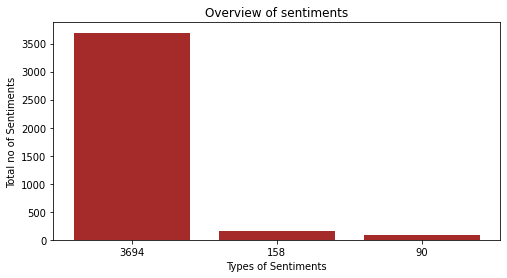

In [ ]:
fig=plt.figure(figsize=(8,4))
overall_sentiment=("Positive","Neutral","Negative")

sentiments=(3694,158,90)


graph=plt.bar(overall_sentiment,sentiments,color='brown')

plt.xticks(overall_sentiment,sentiments)
plt.title('Overview of sentiments')
plt.xlabel('Types of Sentiments')
plt.ylabel('Total no of Sentiments')

plt.show()

##Class Imbalance Problem


In [ ]:
pd.DataFrame(train.name.value_counts())


,name
"Amazon Echo Show Alexa-enabled Bluetooth Speaker with 7"" Screen",676
"All-New Fire HD 8 Tablet, 8"" HD Display, Wi-Fi, 16 GB - Includes Special Offers, Magenta",628
Amazon - Echo Plus w/ Built-In Hub - Silver,483
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Blue Kid-Proof Case",446
"Brand New Amazon Kindle Fire 16gb 7"" Ips Display Tablet Wifi 16 Gb Blue",340
"Fire Tablet, 7 Display, Wi-Fi, 16 GB - Includes Special Offers, Black",294
Amazon Tap - Alexa-Enabled Portable Bluetooth Speaker,177
"Fire Kids Edition Tablet, 7 Display, Wi-Fi, 16 GB, Green Kid-Proof Case",175
"Kindle E-reader - White, 6 Glare-Free Touchscreen Display, Wi-Fi - Includes Special Offers",122
"Fire HD 10 Tablet, 10.1 HD Display, Wi-Fi, 16 GB - Includes Special Offers, Silver Aluminum",82


In [ ]:
train.brand.value_counts() , test_val.brand.value_counts()


(Amazon    3942
 Name: brand, dtype: int64, Amazon    1000
 Name: brand, dtype: int64)

In [ ]:
train.primaryCategories.value_counts()


Electronics                    2562
Electronics,Hardware           1159
Office Supplies,Electronics     204
Electronics,Media                17
Name: primaryCategories, dtype: int64

In [ ]:
test_val.primaryCategories.value_counts()


Electronics                    676
Electronics,Hardware           276
Office Supplies,Electronics     41
Electronics,Media                7
Name: primaryCategories, dtype: int64

In [ ]:
pd.DataFrame(train.categories.value_counts())


,categories
"Electronics,iPad & Tablets,All Tablets,Fire Tablets,Tablets,Computers & Tablets",628
"Computers,Amazon Echo,Virtual Assistant Speakers,Audio & Video Components,Electronics Features,Computer Accessories,Home & Tools,See more Amazon Echo Show Smart Assistant - White,Smart Home Automation,Electronics,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Consumer Electronics,Wireless Speakers,Home Improvement,Amazon Home,Amazon,Computer Speakers,Voice-Enabled Smart Assistants",514
"Amazon Echo,Smart Home,Networking,Home & Tools,Home Improvement,Smart Home Automation,Voice Assistants,Amazon Home,Amazon,Smart Hub & Kits,Digital Device 3",483
"Computers,Fire Tablets,Electronics Features,Computer Accessories,Tablets,Top Rated,Amazon Tablets,Electronics,Kids' Tablets,iPad & Tablets,Cases & Bags,Electronics, Tech Toys, Movies, Music,Computers & Tablets",446
"Computers/Tablets & Networking,Tablets & eBook Readers,Computers & Tablets,Tablets,All Tablets",340
"Fire Tablets,Computers/Tablets & Networking,Tablets,All Tablets,Amazon Tablets,Frys,Computers & Tablets,Tablets & eBook Readers",294
"Fire Tablets,Tablets,All Tablets,Amazon Tablets,Computers & Tablets",231
"Amazon Echo,Home Theater & Audio,MP3 MP4 Player Accessories,Electronics,Portable Audio,Compact Radios Stereos,Smart Hubs & Wireless Routers,Featured Brands,Smart Home & Connected Living,Home Security,Kindle Store,Electronic Components,Home Automation,Mobile Bluetooth Speakers,Home, Garage & Office,Amazon Tap,Home,Mobile Speakers,TVs & Electronics,Portable Bluetooth Speakers,Bluetooth & Wireless Speakers,Electronics Features,Frys,Speakers,Mobile,Digital Device 3,Smart Home,Home Improvement,Electronics, Tech Toys, Movies, Music,Smart Home & Home Automation Devices,Smart Hubs,MP3 Player Accessories,Home Safety & Security,Voice Assistants,Amazon Home,Alarms & Sensors,Portable Audio & Electronics,Amazon Devices,Audio,Bluetooth Speakers,MP3 Accessories,All Bluetooth & Wireless Speakers",177
"Amazon Echo,Virtual Assistant Speakers,Electronics Features,Home & Tools,Smart Home Automation,TVs Entertainment,Speakers,Smart Hub & Kits,Digital Device 3,Wireless Speakers,Smart Home,Home Improvement,Voice Assistants,Amazon Home,Amazon",162
"Office,eBook Readers,Electronics Features,Walmart for Business,Tablets,Electronics,Amazon Ereaders,Office Electronics,iPad & Tablets,Kindle E-readers,All Tablets,Amazon Book Reader,Computers & Tablets",122


In [ ]:
categories = pd.DataFrame(train.categories.str.split(',').tolist()).stack().unique()

categories = pd.DataFrame(categories,columns=['Categories'])

categories

,Categories
0,Electronics
1,iPad & Tablets
2,All Tablets
3,Fire Tablets
4,Tablets
...,...
123,Internet & Media Streamers
124,Streaming Media Players
125,Fire TV
126,Streaming Devices


In [ ]:
train.dtypes


name                 object
brand                object
categories           object
primaryCategories    object
reviews.date         object
reviews.text         object
reviews.title        object
sentiment            object
dtype: object

##Clean the Data

In [ ]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.


True

In [ ]:
name = list(set(list(train['name'])+list(test_val['name'])))
categories = list( set( list( train['categories']) + list(test_val['categories'])))
primaryCategories = list(train['primaryCategories'].unique())

le_name = LabelEncoder()
le_cat = LabelEncoder()
le_pri = LabelEncoder()
le_name.fit(name)
le_cat.fit(categories)
le_pri.fit(primaryCategories)

train['name'] = le_name.transform(train.name)
train['categories'] = le_cat.transform(train.categories)
train['primaryCategories'] = le_pri.transform(train.primaryCategories)
test_val['name'] = le_name.transform(test_val.name)
test_val['categories'] = le_cat.transform(test_val.categories)
test_val['primaryCategories'] = le_pri.transform(test_val.primaryCategories)
test['name'] = le_name.transform(test.name)
test['categories'] = le_cat.transform(test.categories)
test['primaryCategories'] = le_pri.transform(test.primaryCategories)


train['reviews.title'].fillna(value=' ',inplace=True)
test_val['reviews.title'].fillna(value=' ',inplace=True)
test['reviews.title'].fillna(value=' ',inplace=True)

tok = WordPunctTokenizer()
ps = PorterStemmer()
wnl = WordNetLemmatizer()
negations_dic = {"isn't":"is not", "aren't":"are not", "wasn't":"was not", "weren't":"were not",
                "haven't":"have not","hasn't":"has not","hadn't":"had not","won't":"will not",
                "wouldn't":"would not", "don't":"do not", "doesn't":"does not","didn't":"did not",
                "can't":"can not","couldn't":"could not","shouldn't":"should not","mightn't":"might not",
                "mustn't":"must not"}
neg_pattern = re.compile(r'\b(' + '|'.join(negations_dic.keys()) + r')\b')
def data_cleaner(text):
    text = text.replace(r"Äú",'')
    text = text.replace(r'Äù','')
    text = text.replace(r'‚Äô','\'')
    text = text.lower()
    text = text.replace(r'‚Äô','\'')
    text = neg_pattern.sub(lambda x: negations_dic[x.group()], text)
    text = re.sub("[^a-zA-Z0-9\"]", " ", text)
    word_tok=[x for x in tok.tokenize(text) if len(x) > 3]
#     word_stem = [ps.stem(i) for i in word_tok]
#     return (" ".join(word_stem).strip())  
    word_lem = [wnl.lemmatize(i) for i in word_tok]
    return (" ".join(word_lem).strip()) 
for i in (train,test_val,test):
    i['reviews.text']=i['reviews.text'].apply(data_cleaner)
    i['reviews.title']=i['reviews.title'].apply(data_cleaner)

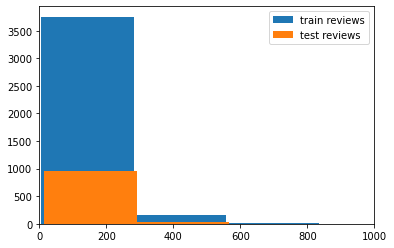

In [ ]:
train_len=train["reviews.text"].str.len()
test_len=test["reviews.text"].str.len()
plt.hist(train_len,bins=20,label="train reviews")
plt.hist(test_len,bins=20,label="test reviews")
plt.legend()
plt.xlim(0,1000)
plt.show()

In [ ]:
# importing all necessery modules 
from wordcloud import WordCloud, STOPWORDS 

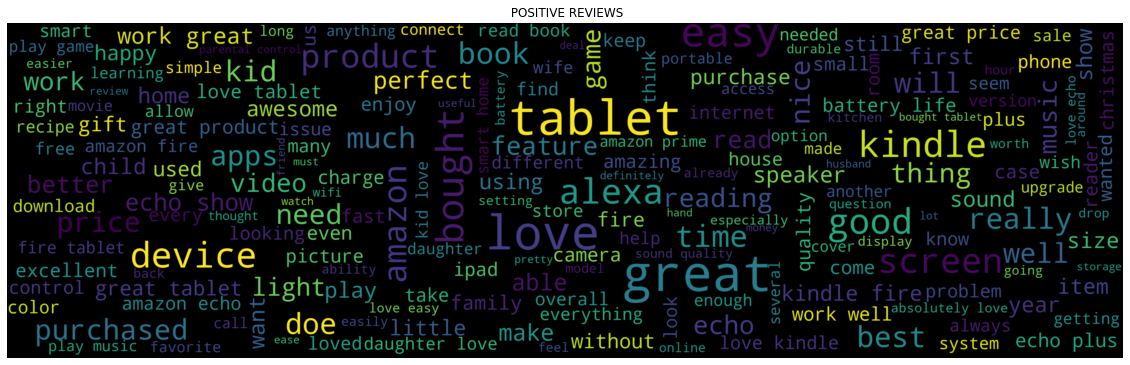

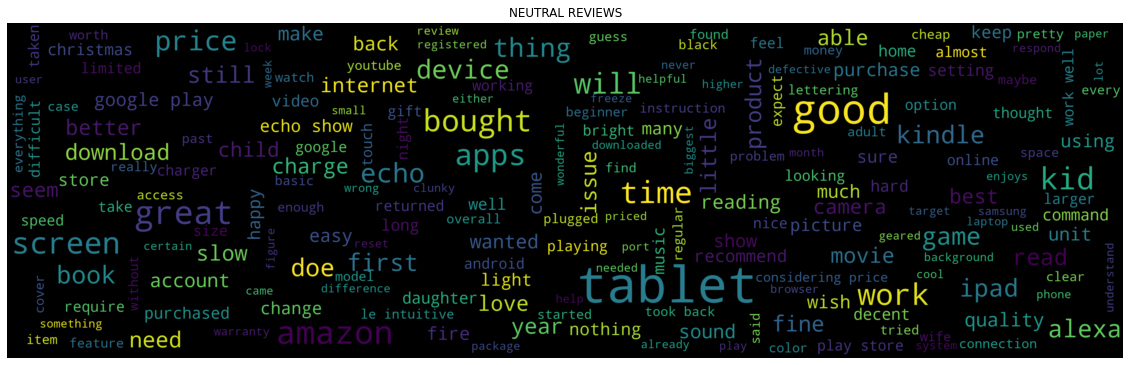

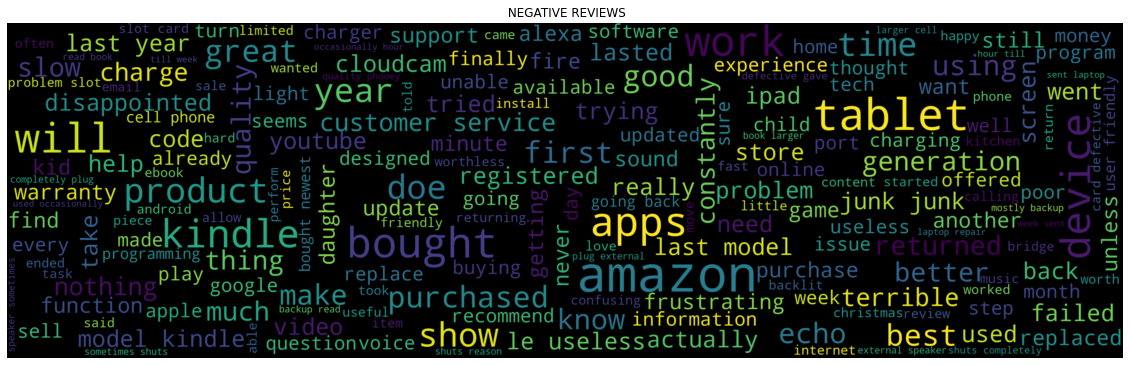

In [ ]:
#all_text = ' '.join([text for text in train['reviews.text']])
pos_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Positive']])
neg_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Negative']])
neu_text = ' '.join([text for text in train['reviews.text'][train['sentiment']=='Neutral']])

##########################

wordcloud = WordCloud(width=4000, height=1200, random_state=21, max_font_size=180).generate(pos_text)
plt.figure(figsize=(20,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' POSITIVE REVIEWS')
plt.show()

##########################

wordcloud = WordCloud(width=4000, height=1200, random_state=21,max_font_size=180).generate(neu_text)
plt.figure(figsize=(20,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('NEUTRAL REVIEWS')
plt.show()

##########################

wordcloud = WordCloud(width=4000, height=1200, random_state=21,max_font_size=180).generate(neg_text)
plt.figure(figsize=(20,25))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' NEGATIVE REVIEWS')
plt.show()


In [ ]:
le_senti = LabelEncoder()
train['sentiment'] = le_senti.fit_transform(train['sentiment'])
test_val['sentiment'] = le_senti.fit_transform(test_val['sentiment'])

##TFIDF Vectorizer

In [ ]:
tvec1 = TfidfVectorizer()
tvec2 = TfidfVectorizer()
tvec3 = TfidfVectorizer()

train1 = train.reset_index()
combi1 = train1.append(test_val,ignore_index=True,sort=False)
tvec1.fit(combi1['reviews.text'])
tvec_text1 = pd.DataFrame(tvec1.transform(train1['reviews.text']).toarray())
tvec_text2 = pd.DataFrame(tvec1.transform(test_val['reviews.text']).toarray())
tvec2.fit(combi1['reviews.title'])
tvec_title1 = pd.DataFrame(tvec2.transform(train1['reviews.title']).toarray())
tvec_title2 = pd.DataFrame(tvec2.transform(test_val['reviews.title']).toarray())
Train1 = pd.concat([train1.drop(['reviews.text','reviews.title','sentiment','index'],axis=1),tvec_text1, tvec_title1],axis=1)
Test_Val1 = pd.concat([test_val.drop(['reviews.text','reviews.title','sentiment'],axis=1),tvec_text2, tvec_title2],axis=1)

x_train1=Train1.values
y_train1=train['sentiment'].values
x_val1=Test_Val1.values
y_val1 = test_val['sentiment'].values

In [ ]:
x_train1.shape, y_train1.shape

((3942, 5537), (3942,))

In [ ]:
from nltk.tokenize import RegexpTokenizer
from nltk.stem.snowball import SnowballStemmer
from sklearn.feature_extraction import text

punc = ['.', ',', '"', "'", '?', '!', ':', ';', '(', ')', '[', ']', '{', '}',"%"]
stop_words = text.ENGLISH_STOP_WORDS.union(punc)

stemmer = SnowballStemmer('english')
tokenizer = RegexpTokenizer(r'[a-zA-Z\']+')

def tokenize(text):
    return [stemmer.stem(word) for word in tokenizer.tokenize(text.lower())]
tvec3 = TfidfVectorizer(stop_words = stop_words, tokenizer = tokenize, max_features = 1000)
reviews=tvec3.fit_transform(combi1['reviews.text'])
words = tvec3.get_feature_names()
print(words)

/usr/local/lib/python3.7/dist-packages/sklearn/feature_extraction/text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['abov', 'afterward', 'alon', 'alreadi', 'alway', 'ani', 'anoth', 'anyon', 'anyth', 'anywher', 'becam', 'becaus', 'becom', 'befor', 'besid', 'cri', 'describ', 'dure', 'els', 'elsewher', 'empti', 'everi', 'everyon', 'everyth', 'everywher', 'fifti', 'forti', 'henc', 'hereaft', 'herebi', 'howev', 'hundr', 'inde', 'mani', 'meanwhil', 'moreov', 'nobodi', 'noon', 'noth', 'nowher', 'onc', 'onli', 'otherwis', 'ourselv', 'perhap', 'pleas', 'sever', 'sinc', 'sincer', 'sixti', 'someon', 'someth', 'sometim', 'somewher', 'themselv', 'thenc', 'thereaft', 'therebi', 'therefor', 'togeth', 'twelv', 'twenti', 'veri', 'whatev', 'whenc', 'whenev', 'wherea', 'whereaft', 'wherebi', 'wherev', 'whi', 'yourselv'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


['abil', 'abl', 'absolut', 'access', 'accessori', 'accident', 'account', 'activ', 'actual', 'ad', 'adapt', 'add', 'addit', 'adjust', 'adult', 'advanc', 'advantag', 'advertis', 'afford', 'age', 'ahead', 'alarm', 'alexa', 'allow', 'alon', 'alot', 'alreadi', 'altern', 'alway', 'amaz', 'amazon', 'android', 'angl', 'annoy', 'anoth', 'answer', 'anybodi', 'anymor', 'anyon', 'anyth', 'anytim', 'anywher', 'app', 'appear', 'appl', 'applic', 'appreci', 'appropri', 'area', 'arlo', 'arriv', 'asid', 'ask', 'aspect', 'assist', 'associ', 'audibl', 'audio', 'auto', 'autom', 'automat', 'avail', 'averag', 'avid', 'awar', 'away', 'awesom', 'awhil', 'babi', 'background', 'backlight', 'backlit', 'backup', 'bargain', 'base', 'basi', 'basic', 'bass', 'batteri', 'beat', 'beauti', 'becaus', 'becom', 'bedroom', 'befor', 'begin', 'beginn', 'believ', 'bell', 'benefit', 'besid', 'best', 'bestbuy', 'better', 'bigger', 'biggest', 'birthday', 'black', 'block', 'blue', 'bluetooth', 'bonus', 'book', 'boot', 'bose', 'bot

##Project Task: Week 2  (Class Imbalance Problem)

In [ ]:
train.sentiment.value_counts()


2    3694
1     158
0      90
Name: sentiment, dtype: int64

In [ ]:
count_2, count_1, count_0 =train.sentiment.value_counts()
class_2 = train[train.sentiment==2]
class_1 = train[train.sentiment==1]
class_0 = train[train.sentiment==0]

In [ ]:
#UnderSampling
class_2_under = class_2.sample(count_1)
train_under= pd.concat([class_2_under,class_1,class_0],axis=0)
print(train_under.shape)
print(train_under.sentiment.value_counts())

(406, 8)
2    158
1    158
0     90
Name: sentiment, dtype: int64


In [ ]:
#OverSampling
class_0_over = class_0.sample(count_2,replace=True)
class_1_over = class_1.sample(count_2,replace=True)
train_over = pd.concat([class_2,class_0_over,class_1_over],axis=0)
print(train_over.shape)
print(train_over.sentiment.value_counts())

(11082, 8)
2    3694
1    3694
0    3694
Name: sentiment, dtype: int64


In [ ]:

nb = MultinomialNB()
nb.fit(Train1.values,train1['sentiment'])
y_pred = nb.predict(Test_Val1.values)
y_val = test_val['sentiment']
print(confusion_matrix(y_true=y_val, y_pred=y_pred))
print(classification_report(y_true=y_val, y_pred=y_pred))
print(accuracy_score(y_val, y_pred)*100)

ValueError: ignored